# Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Set file locations

In [2]:
experimentID = '20230313' #example
path = "./" + experimentID + "/"

fileNames = os.listdir(experimentID)
print(pd.Series(fileNames))

0        20230313(1).CSV
1        20230313(2).CSV
2    L_230313_144245.csv
3    M_230313_143110.csv
dtype: object


## Filter data-files

In [3]:
fileNames = [file for file in fileNames if ").CSV" in file]
# Only grabs csv files ending with ')'
print(pd.Series(fileNames))

0    20230313(1).CSV
1    20230313(2).CSV
dtype: object


### testcode

Plan to extract usefull information (if any) from the three top rows

In [49]:
test_df = pd.read_csv(path + fileNames[1], sep= ";", header=1)
with open(path + fileNames[1], "r") as f:
    frame_name = f.readline()
frame_name_list = frame_name.strip("\n").split(sep=",")
# test_info_df = test_df.loc[[0,1,2]]
# test_df.name = test_df
test_df = test_df.iloc[4:-1]
test_df = test_df.dropna(axis=1)
test_df = test_df.reset_index()

# print(test_info_df)
print(test_df)
print(frame_name_list)

    index    t      Date      Time No.   ML  Temp.     PAR      F    Fm'  \
0       4    2  13.03.23  14:42:47   1  2.0    0.0     0.0  0.400  1.274   
1       5   32  13.03.23  14:43:17   2  2.0    0.0     4.0  0.401  1.247   
2       6   62  13.03.23  14:43:47   3  2.0    0.0     7.0  0.405  1.244   
3       7   92  13.03.23  14:44:17   4  2.0    0.0    18.0  0.440  1.290   
4       8  122  13.03.23  14:44:47   5  2.0    0.0    31.0  0.516  1.308   
5       9  152  13.03.23  14:45:17   6  2.0    0.0    57.0  0.584  1.281   
6      10  182  13.03.23  14:45:47   7  2.0    0.0   123.0  0.702  1.197   
7      11  212  13.03.23  14:46:17   8  2.0    0.0   177.0  0.667  1.023   
8      12  242  13.03.23  14:46:47   9  2.0    0.0   244.0  0.591  0.829   
9      13  272  13.03.23  14:47:17  10  2.0    0.0   350.0  0.522  0.669   
10     14  302  13.03.23  14:47:47  11  2.0    0.0   469.0  0.469  0.567   
11     15  332  13.03.23  14:48:17  12  2.0    0.0   599.0  0.437  0.508   
12     16  3

Gets the local name for each sample (i.e. WT18, 6.1.1 etc.) 

In [6]:
from tailer import tail
from io import StringIO

# Get just last row of the csv
with open(path + fileNames[0], "r") as file:
    last_line = tail(file, 1)
test_series = pd.read_csv(StringIO("/n".join(last_line)), delimiter=";",header=None)
print(test_series)
# Access cell with 
# sample_name = test_df.iloc[-1].loc["No."]
sample_name = test_series.iloc[0].iloc[5]

only_sample_ID = sample_name.split("File: ")[1]
only_sample_ID = only_sample_ID[:only_sample_ID.find(".PWS")]

print(only_sample_ID)
local_ID = list(pd.read_csv(f"./Report/{experimentID}/{only_sample_ID}.txt"))

print(local_ID)

print(path + fileNames[0])

     0   1           2         3         4                            5
0  0.0 NaN  /n     765  19.06.21  16:23:03  File: I_210619_161019.PWS/n
I_210619_161019
['WT18']
./20210619/20210619(2).CSV


Strip rows from dataset

In [7]:
# re-reads in the file (keeps )
no_row_4_df = pd.read_csv(path + fileNames[0],  sep = ';', skiprows = [4])

Get values from the dataset 

In [8]:
#find max Fm
max_Fm = no_row_4_df["Fm'"].max()
#calculate NPQown maxFm/Fm'-1 and place it in a new column "NPQown"
no_row_4_df['NPQown'] = (max_Fm/no_row_4_df["Fm\'"])-1
#find max NPQ
max_NPQ = no_row_4_df["NPQown"].max()
#find max Fo
max_Fo = no_row_4_df["~Fo'"].max()
#calculate phi PSIImax
max_PSII = ((max_Fm - max_Fo)/max_Fm)
#calculate phi PSII' and place it in new column "PSII\'"
no_row_4_df['PSII\''] = ((no_row_4_df["Fm\'"] - max_Fo)/no_row_4_df["Fm\'"])
#calculate qP 
no_row_4_df['qP'] = ((no_row_4_df["Fm\'"] - max_Fm) / (no_row_4_df["Fm\'"] - max_Fo))
#calculate rETR = PSII*PAR
no_row_4_df['rETR'] = no_row_4_df['PSII\''] * no_row_4_df['PAR']

Define x- and y- axis data

In [9]:
x = no_row_4_df['t']
y = no_row_4_df['NPQown']
#y = df['rETR']

Create the plot

['WT18']


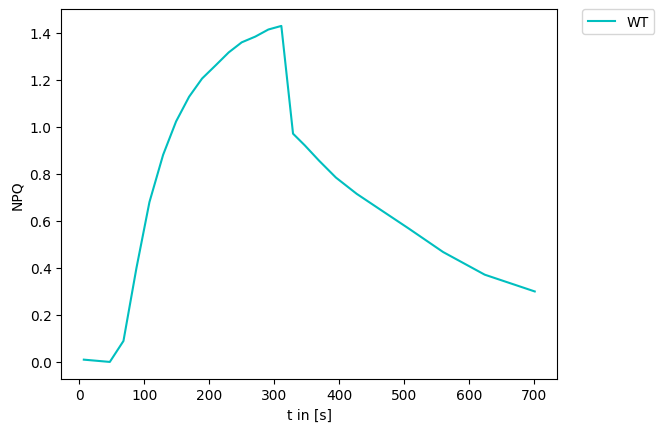

In [10]:
f, ax = plt.subplots()
ax.set_ylabel('NPQ')
ax.set_xlabel('t in [s]')
#ax.set_title('t')
NPQ_wt = []
NPQ_a = []
NPQ_b = []

strings = local_ID
substring = "WT"
sampleA = "LHCX1g1"
sampleB = "LHCX1g2"
print(strings)
# return true if substring ("WT") is in any string in strings (strings has only one string!)
# why not use substring in string without list. Can the .txt have multiple names?
substring_in_list = any(substring in string for string in strings)
if substring_in_list :
    ## NPQ list
    #NPQ_wt.append[max_NPQ]

    ax.plot(x, y, label = "WT", color= 'c')
    
substring_in_list = any(sampleA in string for string in strings)
if substring_in_list :
    
    ax.plot(x, y, label = "mut1", color= 'red')    

substring_in_list = any(sampleB in string for string in strings)
if substring_in_list :
    
    ax.plot(x, y, label = "mut2", color= 'blue') 
    
#y = df['Y(II)']
#ax.plot (x,y, label = 'Y(II)', c = 'black') 

file_patch = mpatches.Patch (label = strings)
ax.legend(handles=[file_patch])
###Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#save the picture
plt.savefig(experimentID + 'colour.png', dpi=300, bbox_inches='tight')
### Generate the plot
plt.show()

### Add label to the graph

## File loop-over

In [11]:
### Loop over all files
for file in fileNames:
    ###before skipping rows extract id to get sample name 
    #donot name id, this is a taken variable
    dfid = pd.read_csv(experimentID + file,  sep = ';', skiprows = [3])
    #latz row can be at 27 or 28! ilic[-n] returns the n last rows
    rows = dfid.tail(1)
    #####Get the unique identifier of each sample (W) to access the txt file with the sample name
    sampleID = rows.iloc[0]['No.']
    N=sampleID.partition(' ')[2]
    W=N.partition('.') [0]
    Name = pd.read_csv('./Report/' + experimentID + '/' + W + '.txt')
    NN=list(Name)
    
    ### Read .csv file and append to list, 
    #therby manually decide to skip rows in the end to trim datasets to the same lenght ( x axis of plot)
    #trimming of line 4 because it contains no data but calculations of f0 and fm that we do not need
    df = pd.read_csv(experimentID + file,  sep = ';', skiprows = [4,29,30,31])
    
    
    #find max Fm
    column = df["Fm'"]
    max_Fm = column.max()
    #calculate NPQown maxFm/Fm'-1
    df['NPQown'] = (max_Fm/df["Fm'"])-1
    #find max NPQ
    columna = df["NPQown"]
    max_NPQ = columna.max()
    #find max Fo
    max_Fo = df["~Fo'"].max()
    #calculate phi PSIImax
    max_PSII = ((max_Fm - max_Fo)/max_Fm)
    #calculate phi PSII'
    df['PSII'] = ((df["Fm'"] - max_Fo)/df["Fm'"])
    #calculate qP 
    df['qP'] = ((df["Fm'"] - max_Fm) / (df["Fm'"] - max_Fo))
    #calculate rETR = PSII*PAR
    df['rETR'] = df['PSII'] * df['PAR']
    
    ##########DEFINE what parameters will be plottet on x and y axis###########
    x = df['t']
    y = df['NPQown']
    #y = df['rETR']
    
    #Fm/Fm'-1
    ### Create line for every file
    #ax.plot(x, y, label = file )
    #ax.plot(x, y, label = NN )
    #######Allocate or change Names of samples########
    strings = NN
    substring = "WT"
    sampleA = "LHCX1g1"
    sampleB = "LHCX1g2"

    substring_in_list = any(substring in string for string in strings)
    if substring_in_list :
        ## NPQ list
        #NPQ_wt.append[max_NPQ]

        ax.plot(x, y, label = "WT", color= 'c')
        
    substring_in_list = any(sampleA in string for string in strings)
    if substring_in_list :
        
        ax.plot(x, y, label = "mut1", color= 'red')    
    
    substring_in_list = any(sampleB in string for string in strings)
    if substring_in_list :
        
        ax.plot(x, y, label = "mut2", color= 'blue') 
        
    #y = df['Y(II)']
    #ax.plot (x,y, label = 'Y(II)', c = 'black') 

FileNotFoundError: [Errno 2] No such file or directory: '2021061920210619(2).CSV'